<center>
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=true" />
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course
Auteur: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Édité par Anna Tarelina (@feuerengel), Mikhail Korshchikov (@ MS4) et [Ousmane Cissé](https://github.com/oussou-dev). Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0] (https://creativecommons.org/licenses/by-nc-sa/4.0/). L'utilisation gratuite est autorisée à des fins non commerciales.

# <center>Mission # 2. Automne 2019
## <center> Partie 1. Les arbres de décision pour la classification et la régression

**Dans cette mission, nous allons découvrir le fonctionnement d'un arbre de décision dans une tâche de régression, puis construire et ajuster des arbres de décision de classification pour l'identification des maladies du cœur.**

Avant d'entamer la mission, nous vous conseillons de consulter le matériel de cours correspondant:
 1. [Classification, arbres-de-décision et k-plus-proches-voisins](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), version interactive sur [Kaggle](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn)
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), version interactive sur [Kaggle](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Forêt aléatoire](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), version intercative sur [Kaggle](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), version interactive sur [Kaggle](https://www.kaggle.com/kashnitsky/topic-5- ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), version interactive sur [Kaggle](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting)
   - Régression logistique, forêt aléatoire et LightGBM dans le cadre de la compétition "Kaggle Forest Cover Type Prediction": [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. Vous pouvez également vous exercer avec des missions de démonstration, plus simples et déjà partagées avec des solutions:
     - "Decision trees with a toy task and the UCI Adult dataset": [mission](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
     - "Logistic Regression and Random Forest in the credit scoring problem": [mission](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. Il y a également 7 conférences vidéo sur les arbres, les forêts, la stimulation et leurs applications : [mlcourse.ai/lectures](https://mlcourse.ai/lectures)  
 

### Votre travail consiste à:
 1. écrire du code et effectuer des calculs dans les cellules ci-dessous
 2. Choisir les réponses dans le [formulaire](https://docs.google.com/forms/d/1-xvxl0xVVvoDYIbcCxxpAc_ pjcWEpnLQ9kaKLHwXsA). Les solutions seront partagées uniquement avec ceux qui ont rempli ce formulaire
 
### <center> Date limite pour A2 : le 6 octobre 2019 à 20h59 (heure de Londres)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Arbres de décision pour la régression : un exemple basé sur un jeu

Considérons le problème de régression unidimensionnel suivant. Nous devons créer une fonction $\large a(x)$ pour approximer la dépendance $\large y = f(x)$ en utilisant le critère d'erreur quadratique moyen: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

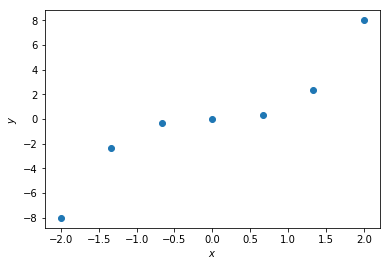

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Faisons plusieurs étapes pour construire un arbre de décision. Dans le cas d'une tâche **de régression**, au moment de la prédiction, la "feuille" renvoie la valeur moyenne pour toutes les observations de cette "feuille.  

Commençons par un arbre de profondeur 0, c’est-à-dire toutes les observations placées dans une seule "feuille".

<br>Vous devrez construire un arbre avec un seul nœud (également appelé **root**) contenant toutes les observations d'entraînement (instances).
<br>Comment les prédictions de cet arbre vont-elles ressembler pour $x \in [-2, 2]$? <br> Créez un tracé approprié en utilisant un stylo, du papier et Python si nécessaire (mais vous n'avez pas encore besoin de `sklearn`).

In [3]:
# You code here

**Premières divisions ou partitions.**
<br>Divisons les données en fonction de la condition suivante $[x < 0]$. Il nous donne l’arbre de profondeur 1 à deux feuilles. Pour clarifier, pour toutes les instances avec $x \geqslant 0$, l’arbre renverra une valeur, pour toutes les instances avec $x < 0$, il retournera une autre valeur. Créons un graphique similaire pour les prédictions de cet arbre.

In [4]:
# You code here

Dans l'algorithme d'arbre de décision, la caractéristique et le seuil de partitonnement choisis en fonction de certains critères. Le critère de régression couramment utilisé est basé sur la variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
où $\large X$ et $\large y$ sont une matrice de caractéristiques et un vecteur cible (en conséquence) pour l'apprentissage d'instances dans un nœud actuel, $\large X_l, y_l$ et $\large X_r, y_r$ sont des divisions d'échantillons $\large X, y$ en deux parties w.r.t. $\large [x_j < t]$ (par $\large j$-ème caractéristique et seuil $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (ou identique, $\large |y|$, $\large |y_l|$, $\large |y_r|$) sont des tailles d'échantillons appropriés, et $\large D(X, y)$ est une variance des réponses $\large y$ pour toutes les instances de $\large X$:
$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Ici $\large y_i = y(x_i)$ est la réponse pour l'instance $\large x_i$. Les indices $\large j$ et seuil $\large t$ sont choisis pour maximiser la valeur du critère $\large Q(X, y, j, t)$ pour chaque division.

Dans notre cas 1D, il n'y a qu'une seule caractéristique, si bien que $\large Q$ ne dépend que du seuil $\large t$ et des données d'apprentissage $\large X$ et $\large y$. Désignons $\large Q_{1d}(X, y, t)$, ce qui signifie que le critère ne dépend plus de l'indice de la caractéristique $\large j$, c'est-à-dire dans le cas 1D $\large j = 1$.

In [5]:
def regression_var_criterion(X, y, t):
    pass
    # You code here

Créez le tracé du critère $\large Q_{1d}(X, y, t)$ en fonction de la valeur de seuil $t$ sur l'intervalle $\large [-1.9, 1.9]$.

In [6]:
# You code here

**<font color='red'>Question 1.</font> Quelle est la valeur de seuil la plus défavorable (pour effectuer une partition) en fonction du critère de variance?**

<font color = 'red'> **Options de réponse:** </font>
- -1,9
- -1,3
- 0
- 1,3
- 1,9

*Pour les discussions, merci de vous en tenir à [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, fil épinglé __#a2_part1_fall2019__*

Faisons ensuite la partition en chacun des noeuds feuilles.
<br> Prenez votre arbre avec le premier seuil [$x<0$].
<br> Maintenant, ajoutez une partition dans la branche de gauche (où la division précédente était $x < 0$) en utilisant le critère $[x < -1.5]$, dans la branche de droite (où la division précédente était $x \geqslant 0$) avec le critère suivant $[x < 1.5]$.
<br>Nous obtenons un arbre de profondeur 2 avec 7 nœuds et 4 feuilles. Créez un graphique de cet arbre pour les prédictions de $x \in [-2, 2]$.

In [7]:
# You code here

**<font color='red'>Question 2.</font> Les prédictions de l'arbre sont une fonction constante par morceaux, n'est-ce pas ? Combien de "morceaux" (segments horizontaux dans le tracé que vous venez de construire) existe-t-il dans l'intervalle [-2, 2]?**

<font color = 'red'> **Options de réponse:** </font>
- 2
- 4
- 6
- 8

*Pour les discussions, merci de vous en tenir à [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, fil épinglé __#a2_part1_fall2019__*

## 2. Construire un arbre de décision pour prédire les maladies cardiaques
Lisons les données sur les maladies cardiaques. Le jeu de données peut être téléchargé à partir du référentiel de cours [ici](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) en cliquant sur `Download` puis en sélectionnant l'option `Save As`. Si vous travaillez avec Git, alors le jeu de données est déjà présent dans `data/mlbootcamp5_train.csv`.

**Problème**

Prédisez la présence ou l'absence de maladie cardiovasculaire (CVD) à l'aide des résultats de l'examen du patient.

**Description des données**

Il existe 3 types de caractéristiques d'entrée:

- *Objective*: information factuelle;
- *Examination*: résultats de l'examen médical;
- *Subjective*: informations données par le patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du jeu de données ont été collectées au moment de l'examen médical.

In [8]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transformer les caractéristiques :
- crée "age in years" en divisant l'âge par 365,25 et en prenant le seuil ($\lfloor{x}\rfloor$ est le plus grand entier inférieur ou égal à $x$)
- créer 3 caractéristiques binaires basées sur `cholesterol`.
- créer 3 caractéristiques binaires basées sur `gluc`.
<br> Caractéristiques binaires égales à 1, 2 ou 3. Cette méthode est appelée codage factice ou codage à chaud -One Hot Encoding- (OHE). Il est plus pratique d'utiliser `pandas.get_dummies`. Il n’est pas nécessaire d’utiliser les caractéristiques originales `cholestérol` et` gluc` après l’encodage.

In [10]:
# You code here

Divisez les données en parties d'entraînement et de test dans la proportion de 7/3 en utilisant `sklearn.model_selection.train_test_split` avec` random_state = 17`.

In [11]:
# You code here
# X_train, X_valid, y_train, y_valid = ...

Entraînez un arbre de décision sur le jeu de données `(X _train, y_ train)` avec **max_depth égale à 3** et `random _state = 17`. Tracez cet arbre avec `sklearn.tree.export_graphviz` et Graphviz. Nous devons mentionner ici que `sklearn` ne dessine pas seul les arbres de décision, mais est capable de générer un arbre au format `.dot` qui peut être utilisé par Graphviz pour la visualisation.

Comment tracer un arbre de décision, alternatives:
 1. Installez vous-même Graphviz et pydotpus (voir ci-dessous)
 2. Utilisez notre image docker avec tous les paquets nécessaires déjà installés
 3. Moyen facile: exécutez `print(dot _data.getvalue())` avec `dot_data` défini ci-dessous (vous pouvez le faire sans pydotplus et Graphviz), allez à http://www.webgraphviz.com, collez la chaîne de caractère de code graphique (digraph Tree {...) et générez une belle image

Il y a peut-être des problèmes avec graphviz pour les utilisateurs Windows.
L'erreur est "GraphViz's executables not found".
<br>Pour résoudre ce problème - installez Graphviz à partir d'[ici](https://graphviz.gitlab.io/_pages/Download/Download_ windows.html).
<br>Puis ajouter graphviz path à votre variable système PATH. Vous pouvez le faire manuellement, mais n'oubliez pas de redémarrer
<br>Ou juste exécuter ce code:

In [12]:
import os
path_to_graphviz = '' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example) 
os.environ["PATH"] += os.pathsep + path_to_graphviz

Regardez comment les arbres sont visualisés dans la [3ème partie](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) du matériel de cours.

**<font color='red'>Question 3.</font> Quelles sont les 3 caractéristiques utilisées pour effectuer des prédictions dans l'arbre de décision créé?**

<font color = 'red'> **Options de réponse:** </font>
- age, ap_lo, chol=1
- age, ap_hi, chol=3
- smoke, age, gender
- alco, weight, gluc=3

*Pour les discussions, merci de vous en tenir à [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, fil épinglé __ #a2_part1_fall2019__*

Faites des prédictions pour les données de validation `(X_valid, y_valid)` avec l'arbre de décision formé. Calculer la précision.

In [13]:
# You code here

Définissez la profondeur (depth) de l’arbre à l’aide de la validation croisée sur le jeu de données `(X _train, y_ train)` afin d’améliorer la qualité du modèle. Utilisez `GridSearchCV` avec 5 folds. Fixez `random_state = 17` et changez` max_depth` de 2 à 10.

In [14]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV # You code here

Tracez le graphique pour montrer comment la précision moyenne change par rapport à la valeur `max_depth` lors de la validation croisée.

In [15]:
# You code here

Affichez la meilleure valeur de `max_depth` où la valeur moyenne de la métrique de qualité de validation croisée atteint son maximum. Calculez également la précision des données de test. Cela peut être fait avec l'instance entraînée de la classe `GridSearchCV`.

In [16]:
# You code here

Calculez l'effet de `GridSearchCV`: vérifiez l'expression (acc2-acc1)/acc1 * 100%, où acc1 et acc2 sont des précisions sur les données de test avant et après le réglage de max_depth avec GridSearchCV, respectivement.

In [17]:
# You code here

**<font color='red'>Question 4.</font> Choisissez toutes les instructions correctes.**

<font color = 'red'> **Options de réponse:** </font>

- Il existe un maximum local de précision sur la courbe de validation construite
- `GridSearchCV` a augmenté la précision sur les données de test de **plus** de 1%
- Il y a **pas** de maximum de précision local sur la courbe de validation construite
- `GridSearchCV` a augmenté la précision sur les données de test de **moins** que 1%

*Pour les discussions, merci de vous en tenir à [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, fil épinglé __#a2_part1_fall2019__*

Consultez le tableau SCORE pour évaluer le risque de maladie cardiovasculaire mortelle sur dix ans en Europe. [source](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='https://github.com/Yorko/mlcourse.ai/blob/master/img/SCORE2007-eng.png?raw=true' width=70%>

Créons de nouvelles caractéristiques en fonction de cette image:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 caractéristiques)
- systolic blood pressure (tension artérielle systolique) : $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 caractéristiques)

Si les valeurs d'âge ou de pression artérielle ne tombent dans aucun des intervalles, toutes les caractéristiques binaires seront égales à zéro.

<br>Ajout d'une caractéristique ``smoke``.
<br>Build les caractéristiques ``cholesterol`` et ``gender``. Transformer le ``cholestérol`` en 3 fonctions binaires en fonction de ses 3 valeurs uniques (``cholestérol`` = 1, ``cholestérol`` = 2 et ``cholestérol`` = 3). Transformez le ``sexe`` de 1 et 2 en 0 et 1. Il vaut mieux le renommer en ``male`` (0 - woman, 1 - man). En général, cela se fait généralement avec ``sklearn.preprocessing.LabelEncoder`` mais ici, dans le cas de 2 valeurs uniques, ce n'est pas nécessaire.

Enfin, l'arbre de décision est construit à l'aide de ces 12 caractéristiques binaires (à l'exclusion de toutes les caractéristiques d'origine dont nous disposions avant cette partie ingénierie des caractéristiques).

Créez un arbre de décision avec la limitation `max_depth = 3` et entraînez-le sur l'ensemble des données d'entraînement. Utilisez la classe `DecisionTreeClassifier` avec` random_ state = 17` fixe, mais tous les autres arguments (à l'exception de `max_depth` et` random_state`) doivent être conservés avec leurs valeurs par défaut.

**<font color='red'>Question 5.</font> Quelle caractéristique binaire est la plus importante pour la détection des maladies cardiaques (c’est-à-dire celle est placée à la racine (root) de l’arbre)?**

<font color = 'red'> **Options de réponse:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

*Pour les discussions, merci de vous en tenir à [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, fil épinglé __#a2_part1_fall2019_*

In [1]:
# You code here